# Exact Cell Decomposition - then shortest path using Dijkstra

Note: The implementation could benefit from several improvements in how the cells are decomposed and how they consider the geometry.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Polygon
import shapely as sl
from dijkstra import lookAtThisGraph
from dijkstra import dijkstra
from planning_helpers import exact_cell_decomposition

Shortest Path from A to F: (14, ['A', 'C', 'B', 'D', 'F'])


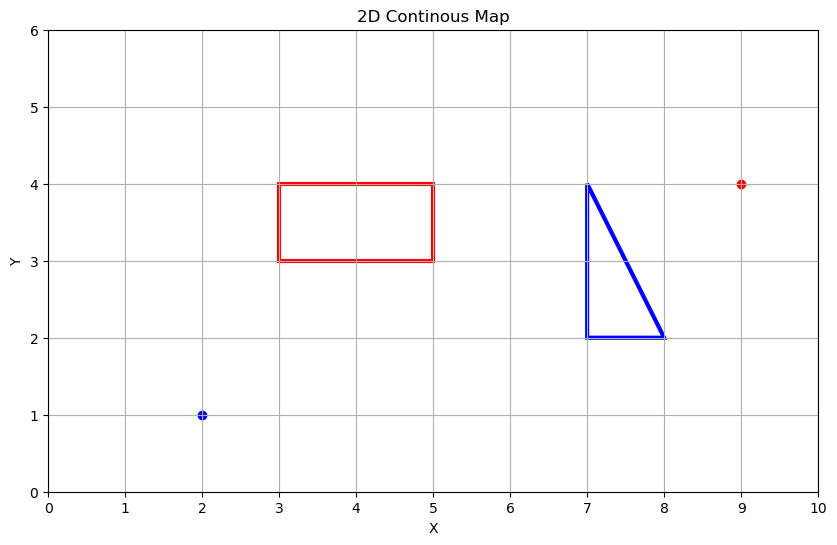

In [4]:
# Set vertices of the obstacles
CB1 = [(3,3),(3,4),(5,4),(5,3)]  # Rectangle
CB2 = [(7,4),(7,2),(8,2)]        # Triangle
CB = [(0,0),(10,0),(10,10),(0,10)] # Boundary

# Plot grid
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.set_aspect('equal', adjustable='box')
ax.set_xticks(range(11))
ax.set_yticks(range(7))
ax.grid(True)
# Plot rectangle
rect = Rectangle((CB1[0][0], CB1[0][1]), CB1[2][0]-CB1[0][0], CB1[2][1]-CB1[0][1], edgecolor='red', facecolor='none',linewidth=3)
ax.add_patch(rect)
# Plot triangle
triangle = Polygon(CB2, closed=True, edgecolor='blue', facecolor='none',linewidth=3)
ax.add_patch(triangle)
# Plot start and end position
qo = (2,1)
qf = (9,4)
ax.scatter(2,1,c='b')
ax.scatter(9,4,c='r')

# Show plot
plt.title('2D Continous Map')
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [6]:
# ALL LINE SEGMENTS MAKING UP OBSTACLES
# Rectangle
l1 = (CB1[0], CB1[3])
l2 = (CB1[3], CB1[2])
l3 = (CB1[2], CB1[1])
l4 = (CB1[1], CB1[0])

# Triangle
l5 = (CB2[1], CB2[2])
l6 = (CB2[2], CB2[0])
l7 = (CB2[0], CB2[1])

lines = np.array([l1,l2,l3,l4,l5,l6,l7]) # ,l8,l9,l10,l11

# VERTICES MAKING UP OBSTACLES:
vertices = [(3,3),(3,4),(5,4),(5,3),(7,4),(7,2),(8,2)]

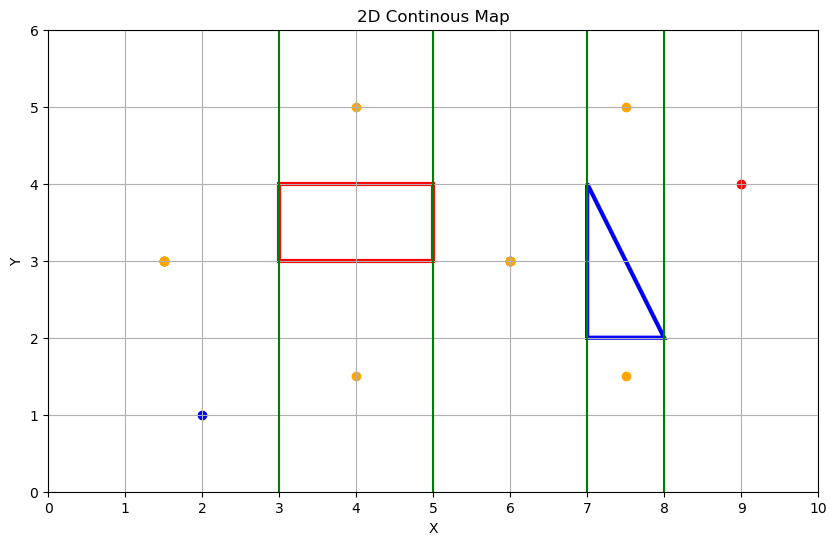

In [8]:
nodes = exact_cell_decomposition(vertices=vertices, lines=lines)

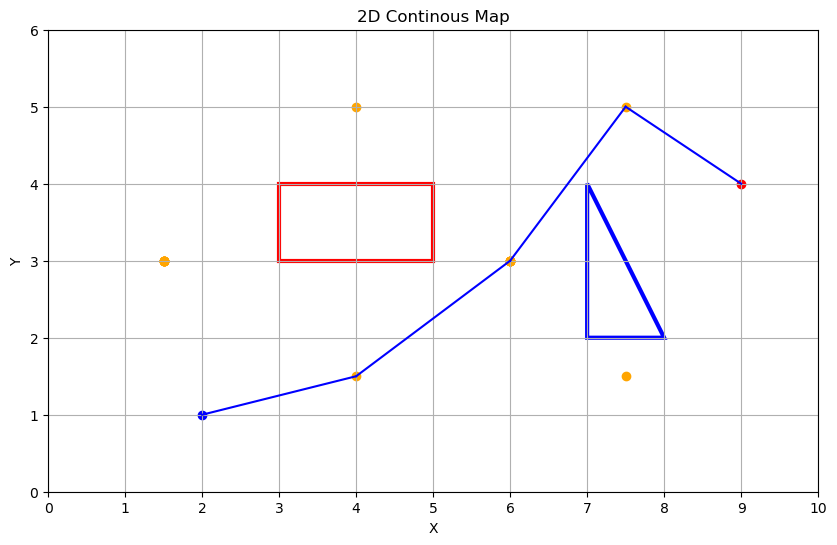

Shortest Path from A to G: 8.864328450540825


In [10]:
# Example usage
g = lookAtThisGraph()

# Add vertices
vertices = ['A', 'B', 'C', 'D', 'E', 'F','G']
for vertex in vertices:
    g.add_vertex(vertex)
    
# Add edges
g.add_edge('A','B', sl.distance(sl.Point(2,1),sl.Point(4,1.5)))
g.add_edge('B','C', sl.distance(sl.Point(4,1.5),sl.Point(6,3)))
g.add_edge('C','D', sl.distance(sl.Point(6,3),sl.Point(7.5,5)))
g.add_edge('D','G', sl.distance(sl.Point(7.5,5),sl.Point(9,4)))

# Find the shortest path from A to F
start_vertex = 'A'
destination_vertex = 'G'
shortest_path_length = dijkstra(g, 'A', 'G')

# Plot grid
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)
ax.set_aspect('equal', adjustable='box')
ax.set_xticks(range(11))
ax.set_yticks(range(7))
ax.grid(True)
# Plot rectangle
rect = Rectangle((CB1[0][0], CB1[0][1]), CB1[2][0]-CB1[0][0], CB1[2][1]-CB1[0][1], edgecolor='red', facecolor='none',linewidth=3)
ax.add_patch(rect)
# Plot triangle
triangle = Polygon(CB2, closed=True, edgecolor='blue', facecolor='none',linewidth=3)
ax.add_patch(triangle)
# Plot start and end position
qo = (2,1)
qf = (9,4)
ax.scatter(2,1,c='b')
ax.scatter(9,4,c='r')

for centroid in nodes:
    ax.scatter(centroid[0],centroid[1],color='orange')

# Plotting the new segments of the path
ax.plot([qo[0],4],[qo[1],1.5],color='blue')
ax.plot([4,6],[1.5,3],color='blue')
ax.plot([6,7.5],[3,5],color='blue')
ax.plot([7.5,9],[5,4],color='blue')

# Show plot
plt.title('2D Continous Map')
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()              
        

print(f"Shortest Path from {start_vertex} to {destination_vertex}: {shortest_path_length}")